## Answering analysis questions

# Import libraries

In [20]:
import os
from sqlalchemy import create_engine
import pandas as pd
from dotenv import load_dotenv
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)



# connect to postgresql

In [21]:
load_dotenv()

def get_engine():
    """
    Returns a reusable SQLAlchemy engine for PostgreSQL.
    Credentials are read from .env file.
    """
    user = os.getenv("PG_USER")
    host = os.getenv("PG_HOST")
    password = os.getenv("PG_PASSWORD")
    port = os.getenv("PG_PORT", 5433)
    db = os.getenv("PG_DB")

    url = f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{db}"

    engine = create_engine(url)
    return engine

def run_query(sql: str) -> pd.DataFrame:
    """
    Executes a SQL query and returns a Pandas DataFrame
    """
    engine = get_engine()
    df = pd.read_sql(sql, engine)
    return df

# EDA

## customers

In [22]:
df_customers = run_query(
    """
    SELECT 
    *
    FROM customers

    """
)

df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [23]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [24]:
df_customers["customer_unique_id"].duplicated().sum()

np.int64(3345)

duplicates are because client id is the primary key to prder table and each order has a client unique id

## orders

In [25]:
df_orders = run_query(
    """
    SELECT 
    *
    FROM orders

    """
)

df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [26]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [27]:
df_orders["order_status"].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [28]:
cols_timestamp = ['order_purchase_timestamp','order_approved_at',
                     'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for column in cols_timestamp:
    df_orders[column] = pd.to_datetime(df_orders[column])

In [29]:
df_orders[df_orders['order_delivered_customer_date'] < df_orders['order_purchase_timestamp']].shape[0]

0

In [30]:
df_orders['diff_del_days'] = (df_orders['order_estimated_delivery_date'] - df_orders['order_delivered_customer_date']).dt.days
df_orders.groupby(df_orders['diff_del_days'] <= 0).size()


diff_del_days
False    90152
True      9289
dtype: int64

9.34% orders were delivered on or before estimated delivery date. ~90% deliveries took place after estimated delivery date

count    96476.000000
mean        10.876881
std         10.183854
min       -189.000000
25%          6.000000
50%         11.000000
75%         16.000000
max        146.000000
Name: diff_del_days, dtype: float64


<Axes: xlabel='diff_del_days', ylabel='Count'>

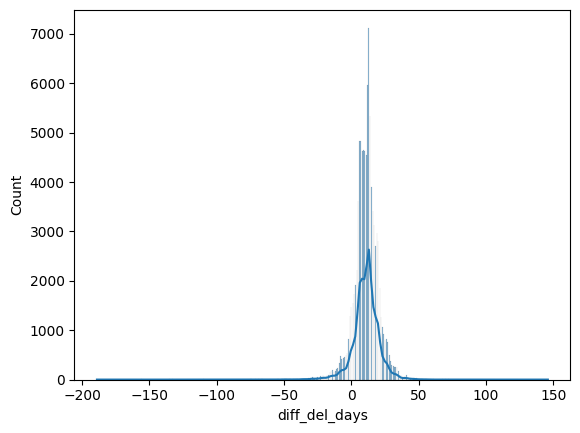

In [33]:
print(df_orders['diff_del_days'].describe())
sns.histplot(x='diff_del_days', data=df_orders, kde=True)

In [35]:
df_orders[df_orders['diff_del_days'] >= 50].shape[0]

104

on an average orders took 10 days more to be delivered to the customer from the estimated delivery date. One order took more than 6 months to get delivered from the estimated delivery date. One order was delivered around 4 months earlier than the estimated delivery date. Also these can be considered outliers when comparing with the remaining orders. Most of the records have a diff in delivery days ranging between -50 to +50

## order items

In [36]:
df_order_items = run_query(
    """
    SELECT 
    *
    FROM order_items

    """
)

df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35-04:00,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13-04:00,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30-05:00,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18-04:00,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51-05:00,199.90,18.14


In [37]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [38]:
df_order_items["order_id"].duplicated().sum()

np.int64(13984)

1 order can have many order items, since this is the item table hence order id can be duplicated and order item id id th eprimary key

/var/folders/b1/gz3qn3z16_36p30zhdb7r3dc0000gn/T/ipykernel_81632/3900126774.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  order_items_agg = df_order_items.groupby('order_id').agg({'price':sum,'freight_value':sum}).reset_index()
/var/folders/b1/gz3qn3z16_36p30zhdb7r3dc0000gn/T/ipykernel_81632/3900126774.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  order_items_agg = df_order_items.groupby('order_id').agg({'price':sum,'freight_value':sum}).reset_index()


<Axes: xlabel='price', ylabel='freight_value'>

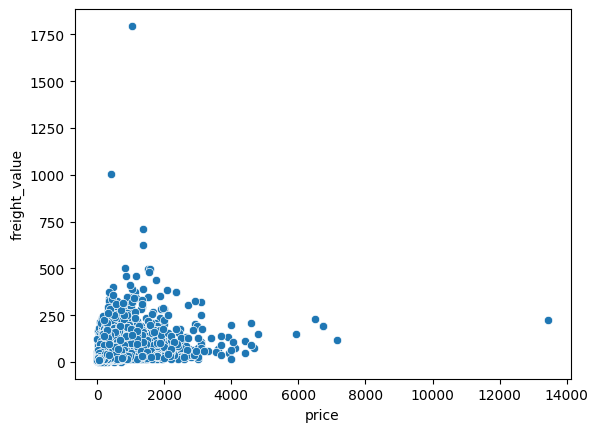

In [39]:
order_items_agg = df_order_items.groupby('order_id').agg({'price':sum,'freight_value':sum}).reset_index()

sns.scatterplot(x='price',y='freight_value',data=order_items_agg)


some orders have a shipping rate over $750 and item price over $12000 which is strange and are outliers here

In [40]:
order_items_agg[order_items_agg["freight_value"] > 750].head()

,order_id,price,freight_value
13955,2455cbeb73fd04b170ca2504662f95ce,419.4,1002.29
79925,cf4659487be50c0c317cff3564c4a840,1050.0,1794.96


In [41]:
order_items_agg[order_items_agg["price"] > 12000].head()

,order_id,price,freight_value
1455,03caa2c082116e1d31e67e9ae3700499,13440.0,224.08


## products

In [42]:
df_prods = run_query(
    """
    SELECT 
    *
    FROM products

    """
)

df_prods.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,translation_id
0,a41e356c76fab66334f36de622ecbd3a,None,NaN,NaN,NaN,650.0,17.0,14.0,12.0,NaN
1,d8dee61c2034d6d075997acef1870e9b,None,NaN,NaN,NaN,300.0,16.0,7.0,20.0,NaN
2,56139431d72cd51f19eb9f7dae4d1617,None,NaN,NaN,NaN,200.0,20.0,20.0,20.0,NaN
3,46b48281eb6d663ced748f324108c733,None,NaN,NaN,NaN,18500.0,41.0,30.0,41.0,NaN
4,5fb61f482620cb672f5e586bb132eae9,None,NaN,NaN,NaN,300.0,35.0,7.0,12.0,NaN


In [43]:
df_prods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
 9   translation_id              32328 non-null  float64
dtypes: float64(8), object(2)
memory usage: 2.5+ MB


More than 500 products have no category name and the other product features. Some cols name have wrong spellings

In [44]:
df_prods_items = run_query(
    """
    SELECT 
    *
    FROM order_items
    LEFT JOIN products USING (product_id)

    """
)

df_prods_items.head()

,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,translation_id
0,4244733e06e7ecb4970a6e2683c13e61,00010242fe8c5a6d1ba2dd792cb16214,1,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35-04:00,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,23.0
1,e5f2d52b802189ee658865ca93d83a8f,00018f77f2f0320c557190d7a144bdd3,1,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13-04:00,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,30.0
2,c777355d18b72b67abbeef9df44fd0fd,000229ec398224ef6ca0657da4fc703e,1,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30-05:00,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,5.0
3,7634da152a4610f1595efa32f14722fc,00024acbcdf0a6daa1e931b038114c75,1,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18-04:00,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,7.0
4,ac6c3623068f30de03045865e4e10089,00042b26cf59d7ce69dfabb4e55b4fd9,1,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51-05:00,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,17.0


In [45]:
df_prods_items[df_prods_items["order_id"] == '2455cbeb73fd04b170ca2504662f95ce']

,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,translation_id
15904,368645a47a15770520ad12d9ea77c2f2,2455cbeb73fd04b170ca2504662f95ce,1,e8f6dc8e6a1dcde89d20e3995c8d90b3,2017-06-28 02:25:20-04:00,69.9,167.05,moveis_decoracao,61.0,603.0,2.0,30000.0,70.0,60.0,60.0,5.0
15905,27761f21b03a32be1aad6ebaebddd747,2455cbeb73fd04b170ca2504662f95ce,2,e8f6dc8e6a1dcde89d20e3995c8d90b3,2017-06-28 02:25:20-04:00,69.9,167.05,moveis_decoracao,52.0,624.0,2.0,13000.0,70.0,60.0,60.0,5.0
15906,5caaa02918381c4ad59d38fdcd4a28b9,2455cbeb73fd04b170ca2504662f95ce,3,e8f6dc8e6a1dcde89d20e3995c8d90b3,2017-06-28 02:25:20-04:00,69.9,167.05,moveis_decoracao,61.0,603.0,2.0,29700.0,70.0,60.0,60.0,5.0
15907,f2bec64d5d795250be5e5ec2d38a19b6,2455cbeb73fd04b170ca2504662f95ce,4,e8f6dc8e6a1dcde89d20e3995c8d90b3,2017-06-28 02:25:20-04:00,69.9,167.05,moveis_decoracao,52.0,614.0,2.0,28800.0,60.0,60.0,60.0,5.0
15908,5dcd17b12ed2175d4fe6157e047d7be2,2455cbeb73fd04b170ca2504662f95ce,5,e8f6dc8e6a1dcde89d20e3995c8d90b3,2017-06-28 02:25:20-04:00,69.9,167.04,moveis_decoracao,60.0,572.0,2.0,27600.0,70.0,60.0,60.0,5.0
15909,b6e406be1aa00db8be5dd3ec6b524d4d,2455cbeb73fd04b170ca2504662f95ce,6,e8f6dc8e6a1dcde89d20e3995c8d90b3,2017-06-28 02:25:20-04:00,69.9,167.05,moveis_decoracao,63.0,603.0,2.0,25100.0,70.0,60.0,60.0,5.0


<Axes: xlabel='product_weight_g', ylabel='Count'>

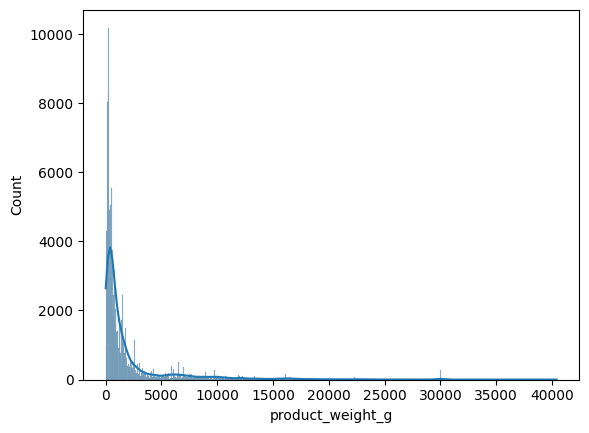

In [47]:
sns.histplot(x='product_weight_g', data=df_prods_items, kde=True)

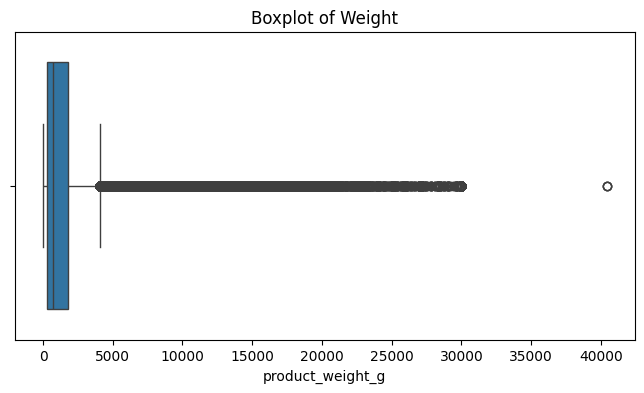

In [48]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_prods_items['product_weight_g'])
plt.title('Boxplot of Weight')
plt.show()



for the freight value outlier we saw earlier,we checked those two order ids above and found that these order were mostly from moveis_decoracao and sinalizacao_e_seguranca product categories, their product weight is very high(>18000g). The product category names are in brazil. If we look at the weights it is right skewed and weights greater than 5k are statistically outliers.

In [49]:
df_prods_items[df_prods_items["order_id"] == '03caa2c082116e1d31e67e9ae3700499']

,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,translation_id
1647,5769ef0a239114ac3a854af00df129e4,03caa2c082116e1d31e67e9ae3700499,1,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20-04:00,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,16.0
1648,5769ef0a239114ac3a854af00df129e4,03caa2c082116e1d31e67e9ae3700499,2,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20-04:00,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,16.0
1649,5769ef0a239114ac3a854af00df129e4,03caa2c082116e1d31e67e9ae3700499,3,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20-04:00,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,16.0
1650,5769ef0a239114ac3a854af00df129e4,03caa2c082116e1d31e67e9ae3700499,4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20-04:00,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,16.0
1651,5769ef0a239114ac3a854af00df129e4,03caa2c082116e1d31e67e9ae3700499,5,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20-04:00,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,16.0
1652,5769ef0a239114ac3a854af00df129e4,03caa2c082116e1d31e67e9ae3700499,6,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20-04:00,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,16.0
1653,5769ef0a239114ac3a854af00df129e4,03caa2c082116e1d31e67e9ae3700499,7,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20-04:00,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,16.0
1654,5769ef0a239114ac3a854af00df129e4,03caa2c082116e1d31e67e9ae3700499,8,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20-04:00,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,16.0


In [50]:
df_prods_items[df_prods_items["product_category_name"] == 'telefonia_fixa'].head()

,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,translation_id
257,6536314c94d43b787fc1c622941da14b,00a843f5a80c7aea894c558acc29f513,1,2138ccb85b11a4ec1e37afbd1c8eda1f,2017-09-08 18:55:14-04:00,32.99,14.10,telefonia_fixa,42.0,309.0,3.0,100.0,19.0,3.0,20.0,16.0
621,6de2587eae9fb1ee54a853aac774ade1,0170fdd7ac7c7bbad5308207bd25a679,1,ef506c96320abeedfb894c34db06f478,2017-07-11 17:13:56-04:00,34.99,7.78,telefonia_fixa,50.0,399.0,3.0,200.0,19.0,5.0,11.0,16.0
1549,22a0a4cfaf39559db703230823bdc13a,039330ccdc3eeb07d44541457391fcae,1,4170f6a9367e6b5d6401d03ce6d54569,2017-10-30 03:49:21-04:00,139.00,17.41,telefonia_fixa,38.0,969.0,1.0,429.0,18.0,13.0,13.0,16.0
1550,22a0a4cfaf39559db703230823bdc13a,039330ccdc3eeb07d44541457391fcae,2,4170f6a9367e6b5d6401d03ce6d54569,2017-10-30 03:49:21-04:00,139.00,17.41,telefonia_fixa,38.0,969.0,1.0,429.0,18.0,13.0,13.0,16.0
1647,5769ef0a239114ac3a854af00df129e4,03caa2c082116e1d31e67e9ae3700499,1,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20-04:00,1680.00,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,16.0


for the high price value outlier we saw earlier, we checked the order id above and found that this order was from telefonia_fixa product category. Price difference is NOT explained by weight or dimensions alone but likely by product complexity and positioning in market.

# ANALYSIS

# GMV:
Which sellers contribute the most to GMV?

Which product categories drive the highest GMV?

How does GMV trend over months? Are there seasonal spikes?

# Order Volume & Growth

How many orders are placed per month?

How many new vs returning customers are placing orders?

In [419]:
# sellers that contribute the most to GMV
# since status delivered is the final step when customer received order and paid , we use this status to calculate final gmv

df_sellers = run_query(
    """
    
    --- sellers that contribute the most to GMV
    --- EXPLAIN ANALYZE

    ------ since order and order item is 1:N relationship, hence using distinct for some metrics

        WITH order_metrics AS (
            SELECT 
                oi.seller_id,
                SUM(CASE 
                    WHEN o.order_status = 'delivered' 
                    THEN oi.price
                    ELSE 0 
                END) AS delivered_items_gmv
            FROM order_items oi
            INNER JOIN orders o 
                ON oi.order_id = o.order_id
            GROUP BY oi.seller_id
        )

        SELECT 
            s.seller_id,
            om.delivered_items_gmv
        FROM sellers s
        INNER JOIN order_metrics om ON s.seller_id = om.seller_id
        ORDER BY om.delivered_items_gmv DESC
        LIMIT 10;
    """
)

df_sellers.head()

,seller_id,delivered_items_gmv
0,4869f7a5dfa277a7dca6462dcf3b52b2,226987.93
1,53243585a1d6dc2643021fd1853d8905,217940.44
2,4a3ca9315b744ce9f8e9374361493884,196882.12
3,fa1c13f2614d7b5c4749cbc52fecda94,190917.14
4,7c67e1448b00f6e969d365cea6b010ab,186570.05


since seller names are anonymous so seller id 4869f7a5dfa277a7dca6462dcf3b52b2 and 53243585a1d6dc2643021fd1853d8905 contributed the most to the gmv

In [428]:
# product categories that drive the highest GMV
df_products = run_query(
    """
    --- product categories that drive the highest GMV
    --- EXPLAIN ANALYZE
    SELECT
        pt.product_category_name_english AS product_category_name,
        SUM(CASE WHEN 
            o.order_status = 'delivered' 
            THEN oi.price 
            ELSE 0 
        END) AS delivered_items_gmv             
    FROM orders o
    INNER JOIN order_items oi ON o.order_id = oi.order_id
    INNER JOIN products p ON oi.product_id = p.product_id
    INNER JOIN product_category_name_translation pt ON p.translation_id = pt.translation_id
    WHERE o.order_status IN ('delivered','canceled')
    GROUP BY 
        pt.product_category_name_english
    ORDER BY delivered_items_gmv DESC
    LIMIT 10;

    """
)

df_products.head()


,product_category_name,delivered_items_gmv
0,health_beauty,1233131.72
1,watches_gifts,1166176.98
2,bed_bath_table,1023434.76
3,sports_leisure,954852.55
4,computers_accessories,888724.61


health_beauty and watches_gifts have the highest gmv

In [ ]:
# How does GMV trend over months? Are there seasonal spikes?

df_monthly_trend = run_query(
    """
    --- EXPLAIN ANALYZE

    --- GMV trend over months &  orders placed per month
    SELECT 
        DATE_TRUNC('month', o.order_purchase_timestamp) AS order_month,
        COUNT(DISTINCT o.order_id) AS order_count,                                                               -- total orders per month
        SUM(CASE WHEN o.order_status = 'delivered' THEN oi.price ELSE 0 END) AS gmv                            
    FROM 
        orders o
    LEFT JOIN 
        order_items oi ON o.order_id = oi.order_id
    GROUP BY 
        DATE_TRUNC('month', o.order_purchase_timestamp)
    ORDER BY 
        order_month

    """
)

df_monthly_trend.head()

,order_month,order_count,gmv
0,2016-09-01,7,134.97
1,2016-10-01,379,40325.11
2,2016-12-01,1,10.90
3,2017-01-01,966,111798.36
4,2017-02-01,1998,234223.40


In [77]:
df_monthly_trend[df_monthly_trend['order_month'] >= '2018-09-01'].head()

,order_month,order_count,gmv
23,2018-09-01,16,0.0
24,2018-10-01,4,0.0


In [207]:
df_monthly_trend["month"] = df_monthly_trend["order_month"].dt.month
monthly_seasonality = (
    df_monthly_trend
    .groupby("month", as_index=False)["gmv"]
    .sum()
)


In [208]:
df_monthly_trend

,order_month,order_count,gmv,month
0,2016-09-01,7,134.97,9
1,2016-10-01,379,40325.11,10
2,2016-12-01,1,10.90,12
3,2017-01-01,966,111798.36,1
4,2017-02-01,1998,234223.40,2
5,2017-03-01,3041,359198.85,3
6,2017-04-01,2697,340669.68,4
7,2017-05-01,4176,489338.25,5
8,2017-06-01,3611,421923.37,6
9,2017-07-01,4576,481604.52,7


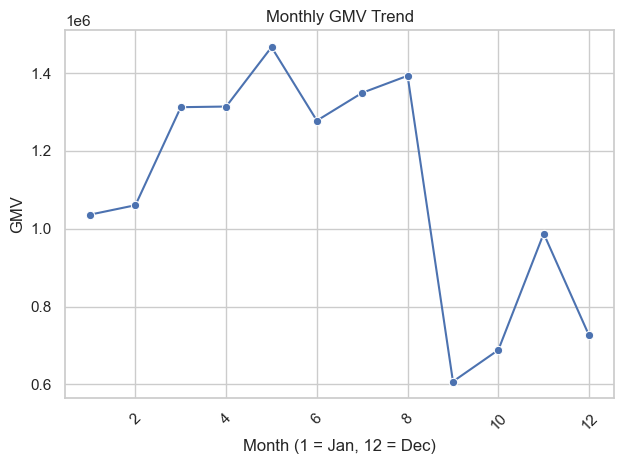

In [209]:
sns.set_theme(style="whitegrid")

plt.figure()
sns.lineplot(
    data=monthly_seasonality,
    x="month",
    y="gmv",
    marker="o"
)

plt.xlabel("Month (1 = Jan, 12 = Dec)")
plt.ylabel("GMV")
plt.title("Monthly GMV Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Peak around May suggests increased activity during/before the holiday/festive season. There is a drop in Sep, means sep has less gmv compared to other months.

In [ ]:
# new vs returning customers placing orders
df_new_vs_return_customers = run_query(
    """
    --- new vs returning customers placing orders
    SELECT
        c.customer_unique_id,
        CASE 
            WHEN COUNT(customer_unique_id) = 1 
            THEN 'new'
            ELSE 'returning'
        END AS customer_type,
        COUNT(DISTINCT o.customer_id) AS total_num_customers,
        COUNT(o.order_id) AS total_num_orders
    FROM orders o
    INNER JOIN customers c 
        ON o.customer_id = c.customer_id
    GROUP BY customer_unique_id


    """
)

df_new_vs_return_customers.head()

,customer_unique_id,customer_type,total_num_customers,num_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,new,1,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,new,1,1
2,0000f46a3911fa3c0805444483337064,new,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,new,1,1
4,0004aac84e0df4da2b147fca70cf8255,new,1,1


In [105]:
df_new_vs_return_customers[df_new_vs_return_customers["customer_type"] == "returning"].shape[0]

2997

In [107]:
df_new_vs_return_customers[df_new_vs_return_customers["customer_type"] == "new"].shape[0]

93099

2997 returning customers are placing orders and 93099 customers are new customers placing orders

# Customer Behavior

What is the repeat buyer rate per month?

Which cities or regions have the highest number of active buyers?

Do certain product categories have higher repeat purchases?

In [211]:
#month and yr
df_repeat_buyers = run_query(
    """
    --- get first order date
    WITH first_order AS (
        SELECT
            c.customer_unique_id,
            MIN(o.order_purchase_timestamp) AS first_order_date
        FROM orders o
        INNER JOIN customers c ON o.customer_id = c.customer_id
        GROUP BY c.customer_unique_id
    ),

    --- customers placing orders per month
    monthly_customers AS (
        SELECT DISTINCT
            DATE_TRUNC('month', o.order_purchase_timestamp) AS order_month,
            c.customer_unique_id        
        FROM orders o
        INNER JOIN customers c ON o.customer_id = c.customer_id
    )

    --- new vs returning customers are placing orders in month
    --- repeat buyer rate per month?
    SELECT
        mc.order_month,
        COUNT(mc.customer_unique_id) AS total_customers,
        COUNT(CASE 
            WHEN fo.first_order_date < mc.order_month 
            THEN mc.customer_unique_id 
        END) AS repeat_customers,
        ROUND(
            COUNT(CASE 
                WHEN fo.first_order_date < mc.order_month 
                THEN mc.customer_unique_id 
            END)::numeric 
            / COUNT(mc.customer_unique_id),
            2
        ) AS repeat_buyer_rate
    FROM monthly_customers mc
    INNER JOIN first_order fo
        ON mc.customer_unique_id = fo.customer_unique_id
    GROUP BY mc.order_month
    ORDER BY mc.order_month;
    """
)

df_repeat_buyers.head()

,order_month,total_customers,repeat_customers,repeat_buyer_rate
0,2016-09-01,4,0,0.0
1,2016-10-01,321,0,0.0
2,2016-12-01,1,0,0.0
3,2017-01-01,765,1,0.0
4,2017-02-01,1755,3,0.0


In [212]:
df_repeat_buyers[df_repeat_buyers["repeat_buyer_rate"] > 0.02].head()

,order_month,total_customers,repeat_customers,repeat_buyer_rate
19,2018-05-01,6814,192,0.03
20,2018-06-01,6128,188,0.03
21,2018-07-01,6230,159,0.03
22,2018-08-01,6460,189,0.03
23,2018-09-01,14,9,0.64


In [213]:
df_repeat_buyers['month_num'] = df_repeat_buyers['order_month'].dt.month
monthly_repeat_rate_sum = df_repeat_buyers.groupby('month_num')['repeat_buyer_rate'].sum()
print(monthly_repeat_rate_sum)


month_num
1     0.02
2     0.02
3     0.02
4     0.03
5     0.04
6     0.04
7     0.04
8     0.04
9     0.66
10    0.77
11    0.02
12    0.02
Name: repeat_buyer_rate, dtype: float64



overall sep,oct have highest repeat buyers (more than 65%) compared to remaining months.

In [148]:
# cities or regions with the highest number of active buyers

df_active_buyers = run_query(
    """
    SELECT 
        c.customer_city,
        DATE_TRUNC('month', o.order_purchase_timestamp) AS order_month,
        COUNT(DISTINCT o.customer_id) AS active_buyers
    FROM orders o
    INNER JOIN customers c ON o.customer_id = c.customer_id
    GROUP BY c.customer_city, order_month
    ORDER BY active_buyers DESC;

    """
)

df_active_buyers.head()

,customer_city,order_month,active_buyers
0,sao paulo,2018-08-01,1308
1,sao paulo,2018-05-01,1222
2,sao paulo,2018-04-01,1166
3,sao paulo,2018-03-01,1151
4,sao paulo,2017-11-01,1118


sao paulo has the highest no of active buyers

In [149]:
# product categories with higher repeat purchases
df_product_cat_high_purchase_rate = run_query(
    """
    --- repeat purchase rate by product category
    WITH customer_category_orders AS (
        SELECT 
            c.customer_unique_id,
            pt.product_category_name_english AS product_category_name,
            COUNT(DISTINCT o.order_id) AS num_orders
        FROM orders o
        INNER JOIN order_items oi ON o.order_id = oi.order_id
        INNER JOIN products p ON oi.product_id = p.product_id
        INNER JOIN customers c ON o.customer_id = c.customer_id
        INNER JOIN product_category_name_translation pt ON p.translation_id = pt.translation_id
        WHERE o.order_status = 'delivered'
        GROUP BY c.customer_unique_id, pt.product_category_name_english
    )
    SELECT
        product_category_name,
        COUNT(customer_unique_id) AS total_customers,
        COUNT(CASE WHEN num_orders > 1 THEN 1 END) AS repeat_customers,
        ROUND(
            COUNT(CASE WHEN num_orders > 1 THEN 1 END)::numeric 
            / COUNT(customer_unique_id), 2
        ) AS repeat_purchase_rate
    FROM customer_category_orders
    GROUP BY product_category_name
    ORDER BY repeat_purchase_rate DESC;

    """
)

df_product_cat_high_purchase_rate.head()

,product_category_name,total_customers,repeat_customers,repeat_purchase_rate
0,arts_and_craftmanship,21,2,0.10
1,home_appliances,688,50,0.07
2,home_comfort_2,23,1,0.04
3,diapers_and_hygiene,24,1,0.04
4,fashion_bags_accessories,1757,52,0.03


In [150]:
df_product_cat_high_purchase_rate[df_product_cat_high_purchase_rate["product_category_name"]== 'air_conditioning'].head()

,product_category_name,total_customers,repeat_customers,repeat_purchase_rate
12,air_conditioning,244,36,0.148


arts_and_craftmanship product category has highest repeat purchase rate

# Operational / Cancellation Metrics

What is the order cancellation rate over time?

Are cancellations clustered by seller? Which seller regions are slower to ship?

Which product categories have the most canceled orders?

In [169]:
# order cancellation rate over time
df_cancellation_metrics_over_time = run_query(
    """
        SELECT
            DATE_TRUNC('month', order_purchase_timestamp) AS month,
            COUNT(*) AS total_orders,
            COUNT(CASE WHEN order_status = 'canceled' THEN 1 END) AS canceled_orders,
            (COUNT(CASE WHEN order_status = 'canceled' THEN 1 END)::numeric / COUNT(*)) * 100 AS cancellation_rate
        FROM orders
        GROUP BY DATE_TRUNC('month', order_purchase_timestamp)
        ORDER BY month;

    """
)

df_cancellation_metrics_over_time.head()

,month,total_orders,canceled_orders,cancellation_rate
0,2016-09-01,4,2,50.000000
1,2016-10-01,324,24,7.407407
2,2016-12-01,1,0,0.000000
3,2017-01-01,800,3,0.375000
4,2017-02-01,1780,17,0.955056


sept 2016 and oct 2016 had the highest cancellation rate

In [163]:
# cancellation rate by seller, seller regions are slower to ship

df_cancellation_metrics = run_query(
    """
    --- cancellation rate by seller
    WITH canceled_orders AS (
        SELECT 
            s.seller_id,
            s.seller_city,
            s.seller_state,
            COUNT(DISTINCT o.order_id) AS cancel_count
        FROM orders o
        INNER JOIN order_items oi ON o.order_id = oi.order_id
        INNER JOIN sellers s ON oi.seller_id = s.seller_id
        WHERE o.order_status='canceled'
        GROUP BY s.seller_id, s.seller_city, s.seller_state
    ),
    total_orders AS (
        SELECT 
            s.seller_id,
            COUNT(o.order_id) OVER (PARTITION BY s.seller_id) AS total_count,
            DATE_TRUNC('month', o.order_purchase_timestamp) AS order_month
        FROM orders o
        INNER JOIN order_items oi ON o.order_id = oi.order_id
        INNER JOIN sellers s ON oi.seller_id = s.seller_id
    )
    SELECT 
        c.seller_id,
        c.seller_city,
        c.seller_state,
        t.total_count AS total_order_count, 
        t.order_month,
        c.cancel_count,
        c.cancel_count::numeric / t.total_count AS cancel_rate
    FROM canceled_orders c
    INNER JOIN total_orders t
        ON t.seller_id = c.seller_id
    order by cancel_rate DESC    
    """
)

df_cancellation_metrics.head()

,seller_id,seller_city,seller_state,total_order_count,order_month,cancel_count,cancel_rate
0,1992f8fb6b19fcccd97ca819811e7267,sao paulo,SP,1,2018-07-01,1,1.0
1,880eda903e719a5f179f7e9fceb3a69d,ipua,SP,1,2018-08-01,1,1.0
2,3febca52652e7209509ccfe61cbde40e,itaquaquecetuba,SP,2,2018-08-01,2,1.0
3,3febca52652e7209509ccfe61cbde40e,itaquaquecetuba,SP,2,2018-08-01,2,1.0
4,8501d82f68d23148b6d78bb7c4a42037,blumenau,SC,1,2017-03-01,1,1.0


In [158]:
df_cancellation_metrics.head(20)

,seller_id,seller_city,seller_state,total_orders,order_month,cancel_count,cancel_rate
0,1992f8fb6b19fcccd97ca819811e7267,sao paulo,SP,1,2018-07-01,1,1.0
1,880eda903e719a5f179f7e9fceb3a69d,ipua,SP,1,2018-08-01,1,1.0
2,3febca52652e7209509ccfe61cbde40e,itaquaquecetuba,SP,2,2018-08-01,2,1.0
3,3febca52652e7209509ccfe61cbde40e,itaquaquecetuba,SP,2,2018-08-01,2,1.0
4,8501d82f68d23148b6d78bb7c4a42037,blumenau,SC,1,2017-03-01,1,1.0
5,001e6ad469a905060d959994f1b41e4f,sao goncalo,RJ,1,2018-08-01,1,1.0
6,86649b1632b1c0e6c0bcb2c90a8b75d8,medianeira,PR,1,2017-08-01,1,1.0
7,3820c6537b3853be1a0687d5a60807ec,cotia,SP,1,2017-03-01,1,1.0
8,afac9f6b0c4e5f0a7ee87e922cd0f873,bauru,SP,1,2018-02-01,1,1.0
9,6e2d3e2dc84fb30f6078f39dd3bddd6f,colombo,PR,1,2017-10-01,1,1.0


there are many sellers with a high cancellation rate, where 1 order was placed and cancelled for same seller, so this seller may have issues and indicate less reliability, we should investigate this seller further

we will see it in detail in bi chart...

In [167]:
# product categories that have the most canceled orders
df_prod_cat_most_cancelled = run_query(
    """
    SELECT
        pt.product_category_name_english AS product_category_name,
        COUNT(DISTINCT o.order_id) AS canceled_orders_count
    FROM orders o
    INNER JOIN order_items oi ON o.order_id = oi.order_id
    INNER JOIN products p ON oi.product_id = p.product_id
    INNER JOIN product_category_name_translation pt ON p.translation_id = pt.translation_id
    WHERE o.order_status = 'canceled'
    GROUP BY pt.product_category_name_english
    ORDER BY canceled_orders_count DESC
    LIMIT 10; 

    """
)

df_prod_cat_most_cancelled.head()

,product_category_name,canceled_orders_count
0,sports_leisure,47
1,housewares,37
2,health_beauty,36
3,computers_accessories,35
4,toys,31


sports_leisure and housewares have the most cancelled orders

# Delivery / Logistics

What is the average delivery time?

Are certain sellers or cities experiencing delays?

In [ ]:
# avg delivery time
df_avg_delivery_time = run_query(
    """
        SELECT
            ROUND(AVG(EXTRACT(EPOCH FROM (o.order_delivered_customer_date - o.order_purchase_timestamp))/86400), 2) AS avg_delivery_days
        FROM orders o
        WHERE o.order_delivered_customer_date IS NOT NULL;
    """
)

df_avg_delivery_time.head()

,avg_delivery_days
0,12.56


In [177]:

df_sellers_exp_delay = run_query(
    """
        WITH seller_orders AS (
            SELECT DISTINCT
                s.seller_id,
                o.order_id,
                EXTRACT(EPOCH FROM (o.order_delivered_customer_date - o.order_purchase_timestamp))/86400 AS delivery_days
            FROM orders o
            INNER JOIN order_items oi ON o.order_id = oi.order_id
            INNER JOIN sellers s ON oi.seller_id = s.seller_id
            WHERE o.order_delivered_customer_date IS NOT NULL
        )
        SELECT
            seller_id,
            ROUND(AVG(delivery_days), 2) AS avg_delivery_days
        FROM seller_orders
        GROUP BY seller_id
        ORDER BY avg_delivery_days DESC
        LIMIT 10;
    """
)

df_sellers_exp_delay.head()

,seller_id,avg_delivery_days
0,df683dfda87bf71ac3fc63063fba369d,189.86
1,8e670472e453ba34a379331513d6aab1,86.00
2,586a871d4f1221763fddb6ceefdeb95e,68.62
3,4fb41dff7c50136976d1a5cf004a42e2,66.75
4,8629a7efec1aab257e58cda559f03ba7,59.23


In [180]:
df_sellers_exp_delay[df_sellers_exp_delay['avg_delivery_days'] > 12].shape[0]

10

seller df683dfda87bf71ac3fc63063fba369d experiences most delay. Only 12 sellers experience a delay greater than 12 days

In [ ]:
# cities experiencing delays
df_cities_exp_delay = run_query(
    """
        WITH city_orders AS (
            SELECT
                c.customer_city,
                EXTRACT(EPOCH FROM (o.order_delivered_customer_date - o.order_purchase_timestamp))/86400 AS delivery_days
            FROM orders o
            INNER JOIN customers c ON o.customer_id = c.customer_id
            WHERE o.order_delivered_customer_date IS NOT NULL
        )
        SELECT
            customer_city,
            ROUND(AVG(delivery_days), 2) AS avg_delivery_days
        FROM city_orders
        GROUP BY customer_city
        ORDER BY avg_delivery_days DESC
        LIMIT 10;


    """
)

df_cities_exp_delay.head()

,customer_city,avg_delivery_days
0,novo brasil,148.17
1,capinzal do norte,109.08
2,adhemar de barros,97.47
3,arace,86.40
4,marcelino vieira,78.18



# Customer Segmentation / Clustering

Can we segment buyers into high-value / mid-value / low-value groups using RFM (Recency, Frequency, Monetary)?

Which segments contribute most to GMV?

#### using the chart from - https://documentation.bloomreach.com/engagement/docs/rfm-segmentation to calculate rfm scores

In [188]:

df_rfm = run_query(
    """
        WITH customer_rfm AS (
            SELECT
                c.customer_unique_id,
                MAX(o.order_purchase_timestamp) AS last_order_date,       -- for recency
                COUNT(DISTINCT o.order_id) AS frequency,                  -- total orders
                SUM(oi.price) AS monetary             -- total GMV
            FROM orders o
            JOIN customers c ON o.customer_id = c.customer_id
            JOIN order_items oi ON o.order_id = oi.order_id
            GROUP BY c.customer_unique_id
        )
        SELECT 
            *,
            EXTRACT(DAY FROM (CURRENT_DATE - last_order_date)) AS recency_days
        FROM customer_rfm


    """
)

df_rfm.head()

,customer_unique_id,last_order_date,frequency,monetary,recency_days
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,129.90,2817.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,18.90,2820.0
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,69.00,3243.0
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,25.99,3027.0
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,180.00,2994.0


In [ ]:

df_rfm_segments = run_query(
    """
        WITH customer_rfm AS (
            SELECT
                c.customer_unique_id,
                MAX(o.order_purchase_timestamp) AS last_order_date,       -- for recency
                COUNT(DISTINCT o.order_id) AS frequency,                  -- total orders
                SUM(oi.price) AS monetary                                  -- total GMV
            FROM orders o
            INNER JOIN customers c ON o.customer_id = c.customer_id
            INNER JOIN order_items oi ON o.order_id = oi.order_id
            GROUP BY c.customer_unique_id
        ),
        rfm_with_recency AS (
            SELECT *,
                EXTRACT(DAY FROM (CURRENT_DATE - last_order_date)) AS recency_days
            FROM customer_rfm
        ),

        rfm_scores AS (
            SELECT *,
                NTILE(5) OVER (ORDER BY recency_days ASC) AS recency_score,  -- smaller recency = higher score
                NTILE(5) OVER (ORDER BY frequency DESC) AS frequency_score, -- higher frequency = higher score
                NTILE(5) OVER (ORDER BY monetary DESC) AS monetary_score   -- higher spend = higher score
            FROM rfm_with_recency
        ),

        rfm_codes AS (
            SELECT *,
                recency_score::text || frequency_score::text || monetary_score::text AS rfm_score
            FROM rfm_scores
        )

        SELECT *,
            CASE
                WHEN rfm_score IN ('555','554','544','545','454','455','445') THEN 'Champions'
                WHEN rfm_score IN ('543','444','435','355','354','345','344','335') THEN 'Loyal'
                WHEN rfm_score IN ('553','551','552','541','542','533','532','531','452','451','442','441','431','453','433','432','423','353','352','351','342','341','333','323') THEN 'Potential Loyalist'
                WHEN rfm_score IN ('512','511','422','421','412','411','311') THEN 'New Customers'
                WHEN rfm_score IN ('525','524','523','522','521','515','514','513','425','424','413','414','415','315','314','313') THEN 'Promising'
                WHEN rfm_score IN ('535','534','443','434','343','334','325','324') THEN 'Need Attention'
                WHEN rfm_score IN ('331','321','312','221','213','231','241','251') THEN 'About To Sleep'
                WHEN rfm_score IN ('155','154','144','214','215','115','114','113') THEN 'Cannot Lose Them'
                WHEN rfm_score IN ('255','254','245','244','253','252','243','242','235','234','225','224','153','152','145','143','142','135','134','133','125','124') THEN 'At Risk'
                WHEN rfm_score IN ('332','322','233','232','223','222','132','123','122','212','211') THEN 'Hibernating Customers'
                ELSE 'Other'
            END AS customer_segment
        FROM rfm_codes;







    """
)

df_rfm_segments.head()

,customer_unique_id,last_order_date,frequency,monetary,recency_days,recency_score,frequency_score,monetary_score,rfm_score,customer_segment
0,ff22e30958c13ffe219db7d711e8f564,2018-09-03 09:06:57,2,290.00,2701.0,1,1,1,111,Other
1,0c6d7218d5f3fa14514fd29865269993,2018-08-29 09:48:09,1,169.80,2706.0,1,2,2,122,Hibernating Customers
2,5c58de6fb80e93396e2f35642666b693,2018-08-29 14:18:23,1,418.00,2706.0,1,1,1,111,Other
3,afbcfd0b9c5233e7ccc73428526fbb52,2018-08-29 08:46:11,1,457.75,2706.0,1,1,1,111,Other
4,b701bebbdf478f5500348f03aff62121,2018-08-29 14:52:00,1,24.90,2706.0,1,3,5,135,At Risk


In [204]:

df_rfm_segments_summary = run_query(
    """
        WITH customer_rfm AS (
            SELECT
                c.customer_unique_id,
                MAX(o.order_purchase_timestamp) AS last_order_date,       -- for recency
                COUNT(DISTINCT o.order_id) AS frequency,                  -- total orders
                SUM(oi.price) AS monetary                                 -- total GMV
            FROM orders o
            INNER JOIN customers c ON o.customer_id = c.customer_id
            INNER JOIN order_items oi ON o.order_id = oi.order_id
            GROUP BY c.customer_unique_id
        ),
        rfm_with_recency AS (
            SELECT *,
                EXTRACT(DAY FROM (CURRENT_DATE - last_order_date)) AS recency_days
            FROM customer_rfm
        ),

        rfm_scores AS (
            SELECT *,
                NTILE(5) OVER (ORDER BY recency_days ASC) AS recency_score,  -- smaller recency = higher score
                NTILE(5) OVER (ORDER BY frequency DESC) AS frequency_score, -- higher frequency = higher score
                NTILE(5) OVER (ORDER BY monetary DESC) AS monetary_score   -- higher spend = higher score
            FROM rfm_with_recency
        ),

        rfm_codes AS (
            SELECT *,
                recency_score::text || frequency_score::text || monetary_score::text AS rfm_score
            FROM rfm_scores
        ),

        rfm_segmented AS (
            SELECT *,
                CASE
                    WHEN rfm_score IN ('555','554','544','545','454','455','445') THEN 'Champions'
                    WHEN rfm_score IN ('543','444','435','355','354','345','344','335') THEN 'Loyal'
                    WHEN rfm_score IN ('553','551','552','541','542','533','532','531','452','451','442','441','431','453','433','432','423','353','352','351','342','341','333','323') THEN 'Potential Loyalist'
                    WHEN rfm_score IN ('512','511','422','421','412','411','311') THEN 'New Customers'
                    WHEN rfm_score IN ('525','524','523','522','521','515','514','513','425','424','413','414','415','315','314','313') THEN 'Promising'
                    WHEN rfm_score IN ('535','534','443','434','343','334','325','324') THEN 'Need Attention'
                    WHEN rfm_score IN ('331','321','312','221','213','231','241','251') THEN 'About To Sleep'
                    WHEN rfm_score IN ('155','154','144','214','215','115','114','113') THEN 'Cannot Lose Them'
                    WHEN rfm_score IN ('255','254','245','244','253','252','243','242','235','234','225','224','153','152','145','143','142','135','134','133','125','124') THEN 'At Risk'
                    WHEN rfm_score IN ('332','322','233','232','223','222','132','123','122','212','211') THEN 'Hibernating Customers'
                    ELSE 'Other'
                END AS customer_segment
            FROM rfm_codes
        )
      

        SELECT
            customer_segment,
            COUNT(customer_unique_id) AS num_customers,
            MAX(rfm_score) as max_rfm_score,
            SUM(monetary) AS total_gmv,
            SUM(frequency) AS total_orders,
            ROUND(AVG(frequency), 2) AS avg_orders,
            ROUND(AVG(recency_days), 1) AS avg_recency_days
        FROM rfm_segmented
        GROUP BY customer_segment
        ORDER BY total_gmv DESC;


    """
)

df_rfm_segments_summary

,customer_segment,num_customers,max_rfm_score,total_gmv,total_orders,avg_orders,avg_recency_days
0,New Customers,13968,512,3630575.47,15147.0,1.08,3040.8
1,Hibernating Customers,18626,322,2975256.84,19184.0,1.03,2839.0
2,Potential Loyalist,12060,553,2084316.20,12060.0,1.00,3044.2
3,Other,4134,131,1623066.97,4738.0,1.15,2752.7
4,About To Sleep,1224,331,967370.49,1480.0,1.21,2885.2
5,At Risk,10836,255,592901.46,10836.0,1.00,2813.1
6,Promising,3876,523,500137.76,4311.0,1.11,3166.4
7,Loyal,11456,444,499289.08,11456.0,1.00,2959.4
8,Champions,11477,555,402653.33,11477.0,1.00,3130.4
9,Cannot Lose Them,7596,215,304431.91,7810.0,1.03,2750.8


most customers placed 1 order. new customers contributed the most to total gmv based on RFM.

/var/folders/b1/gz3qn3z16_36p30zhdb7r3dc0000gn/T/ipykernel_81632/3702555772.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


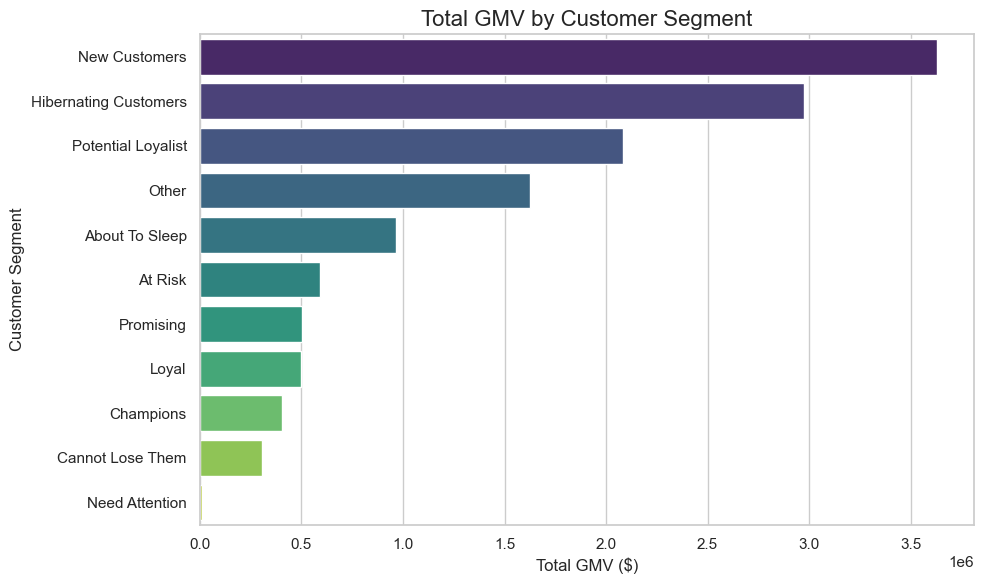

In [205]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(
    x="total_gmv",
    y="customer_segment",
    data=df_rfm_segments_summary,
    palette="viridis"
)

plt.title("Total GMV by Customer Segment", fontsize=16)
plt.xlabel("Total GMV ($)", fontsize=12)
plt.ylabel("Customer Segment", fontsize=12)
plt.tight_layout()
plt.show()

/var/folders/b1/gz3qn3z16_36p30zhdb7r3dc0000gn/T/ipykernel_81632/85809038.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


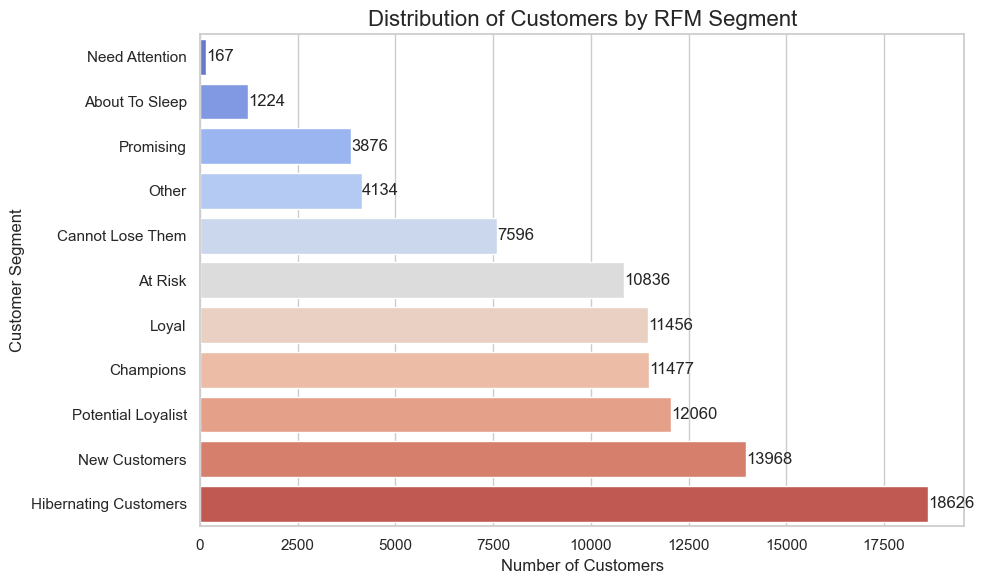

In [206]:
rfm_summary = df_rfm_segments_summary.sort_values('num_customers', ascending=True)

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(
    x="num_customers",
    y="customer_segment",
    data=rfm_summary,
    palette="coolwarm"
)

for index, value in enumerate(rfm_summary['num_customers']):
    plt.text(value + 5, index, str(value), va='center')

plt.title("Distribution of Customers by RFM Segment", fontsize=16)
plt.xlabel("Number of Customers", fontsize=12)
plt.ylabel("Customer Segment", fontsize=12)
plt.tight_layout()
plt.show()